In [164]:
import random
import numpy as np
from scipy.spatial import Voronoi, voronoi_plot_2d

import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection

In [165]:
# Setup polygon plotting area

x_bounds = np.array([0,13])
x_buffer = np.array([1,-1])

y_bounds = np.array([0,16])
y_buffer = np.array([1,-1])

# Setup printing area

x_plot = x_bounds + x_buffer
y_plot = y_bounds + y_buffer

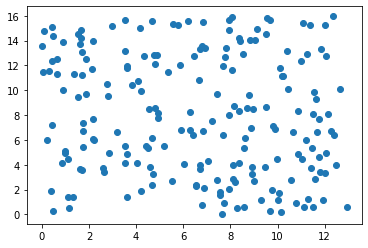

In [166]:
# Create random points for Voronoi diagram

num_points = 200
x = np.random.uniform(low=0, high=1, size=num_points).reshape(num_points, 1)*x_bounds[1]
y = np.random.uniform(low=0, high=1, size=num_points).reshape(num_points, 1)*y_bounds[1]
plt.scatter(x, y)

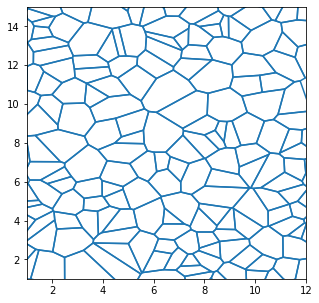

In [167]:
# Prep Voronoi input 
pts = np.hstack([x, y])
vor = Voronoi(pts)
verts = vor.vertices
shapes_ind = vor.regions

# Close the shapes by adding the first point to the end of each shape ([1,4,2]->[1,4,2,1])
# Remove empty shapes and shapes out of bounds (contains -1)
shapes_ind = [x + x[0:1] for i,x in enumerate(shapes_ind) if len(x) != 0 and -1 not in x]
shapes = [verts[x] for i,x in enumerate(shapes_ind)]

# Plot Voronoi diagram
fig, ax = plt.subplots(figsize=(5,5))
ax.set_xlim(x_plot)
ax.set_ylim(y_plot)
lc = LineCollection(shapes)
ax.add_collection(lc)

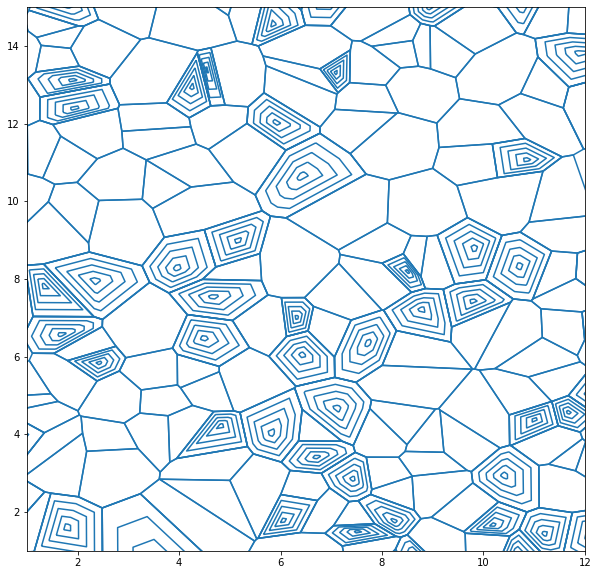

In [168]:
perc_fill = 0.3
total_polys = len(shapes)
filled_polys = int(perc_fill*total_polys)
polygon_ind = random.sample(range(total_polys), filled_polys)

for i in range(filled_polys):
    polygon = shapes[polygon_ind[i]]
    
    center = np.mean(polygon, axis=0)
    poly_center = polygon - center
    min_scale = 0.1
    n_fill_lines = 5

    for i in np.linspace(min_scale, 1, num=n_fill_lines):
        scaled_poly = i*(poly_center)+center
        shapes.append(scaled_poly)
    
fig, ax = plt.subplots(figsize=(10,10))
ax.set_xlim(x_plot)
ax.set_ylim(y_plot)
lc = LineCollection(shapes)
ax.add_collection(lc)

x = np.random.uniform(low=0, high=1, size=num_points)